In [5]:
! pip install opencv-python
! pip install deepface
! pip install opencv-contrib-python

In [6]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [93]:
img = cv2.imread('Happy boy.jpg')

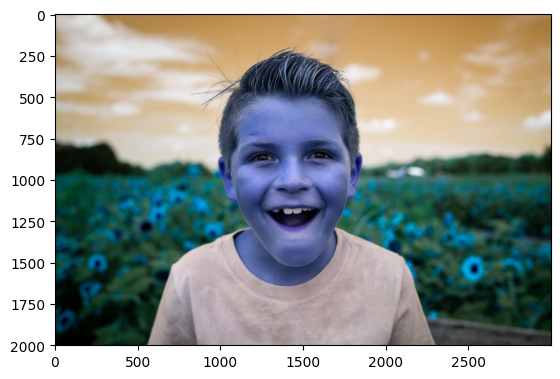

In [51]:
plt.imshow(img) #By default its in BGR

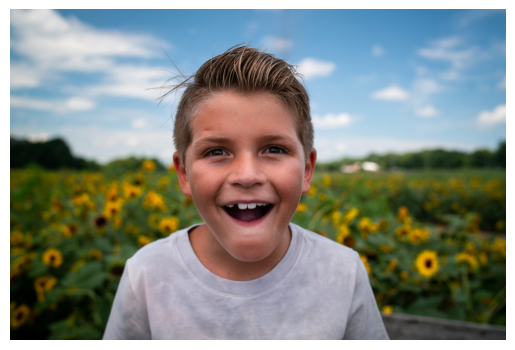

In [52]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [53]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]  


In [54]:
predictions

[{'emotion': {'angry': np.float32(1.2172703e-08),
   'disgust': np.float32(1.2703014e-18),
   'fear': np.float32(1.2543533e-10),
   'happy': np.float32(99.99454),
   'sad': np.float32(2.8458513e-07),
   'surprise': np.float32(1.5465339e-05),
   'neutral': np.float32(0.005443264)},
  'dominant_emotion': 'happy',
  'region': {'x': 959,
   'y': 479,
   'w': 942,
   'h': 942,
   'left_eye': (1575, 856),
   'right_eye': (1260, 870)},
  'face_confidence': np.float64(0.91),
  'age': 23,
  'gender': {'Woman': np.float32(35.799877), 'Man': np.float32(64.20012)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(1.9862083),
   'indian': np.float32(2.0221615),
   'black': np.float32(0.59882927),
   'white': np.float32(37.348927),
   'middle eastern': np.float32(9.30813),
   'latino hispanic': np.float32(48.73574)},
  'dominant_race': 'latino hispanic'}]

In [55]:
type(predictions)

list

In [56]:
predictions[0]['dominant_emotion']


'happy'

# We r trying to draw a rectangle across a face

In [57]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [58]:
cv2.CascadeClassifier

cv2.CascadeClassifier

In [94]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)
#draw a rectangle around the face
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 20)

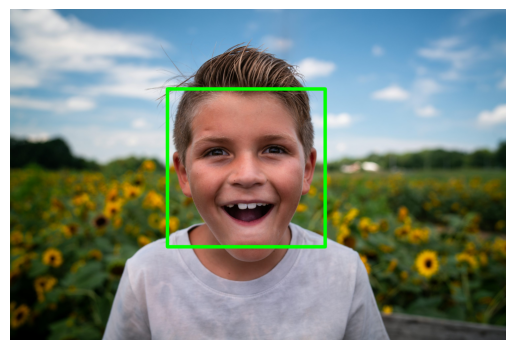

In [95]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [98]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (50, 150),
            font, 
            6,
            (0, 0, 255),
            10,
            cv2.LINE_8) ;

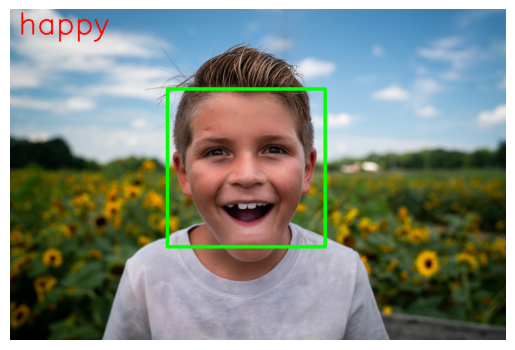

In [99]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [102]:
img = cv2.imread('Sad boy.jpeg')

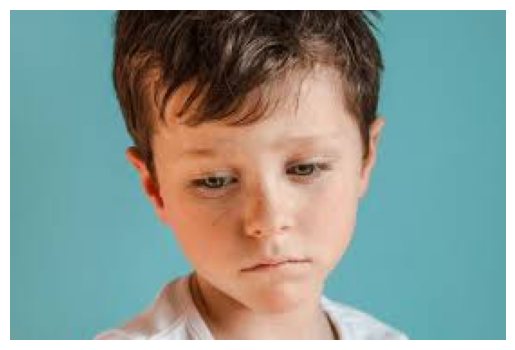

In [103]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [104]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]  


In [105]:
predictions

[{'emotion': {'angry': np.float32(0.4472928),
   'disgust': np.float32(6.644712e-06),
   'fear': np.float32(2.7372823),
   'happy': np.float32(0.067357056),
   'sad': np.float32(11.226614),
   'surprise': np.float32(0.000798528),
   'neutral': np.float32(85.520645)},
  'dominant_emotion': 'neutral',
  'region': {'x': 76,
   'y': 41,
   'w': 131,
   'h': 131,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.97),
  'age': 27,
  'gender': {'Woman': np.float32(4.2559543), 'Man': np.float32(95.74405)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(17.286358),
   'indian': np.float32(2.955465),
   'black': np.float32(0.7542304),
   'white': np.float32(35.375664),
   'middle eastern': np.float32(11.268597),
   'latino hispanic': np.float32(32.359688)},
  'dominant_race': 'white'}]

In [112]:
import cv2  # Ensure OpenCV is installed: pip install opencv-python
from deepface import DeepFace  # Ensure DeepFace is installed: pip install deepface

# Load the pre-trained face detection model
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize webcam
cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    try:
        # Analyze the frame for emotions using DeepFace
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

        # Convert to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.1, 4)

        # Draw a rectangle around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the dominant emotion
        font = cv2.FONT_HERSHEY_SIMPLEX
        emotion = result[0]['dominant_emotion']
        cv2.putText(frame, emotion, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)

    except Exception as e:
        print("Error during analysis:", e)

    cv2.imshow('Emotion Detection', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) in [27, ord('q')]:  # ESC or 'q' to quit
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
